In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

df = pd.read_csv('data_jobs.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [2]:
df_da_ind = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')].copy()

In [3]:
df_da_ind['job_posted_month_no'] = df_da_ind['job_posted_date'].dt.month

In [4]:
df_da_ind_explode = df_da_ind.explode('job_skills')

In [5]:
df_da_ind_pivot = df_da_ind_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value = 0)

In [6]:
df_da_ind_pivot.loc['Total'] = df_da_ind_pivot.sum()
df_da_ind_pivot = df_da_ind_pivot[df_da_ind_pivot.loc['Total'].sort_values(ascending=False).index]
df_da_ind_pivot = df_da_ind_pivot.drop('Total')

df_da_ind_pivot



job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,305,216,218,159,98,89,128,46,32,43,...,0,1,0,0,0,0,0,0,1,0
2,209,148,156,116,75,67,82,26,33,25,...,0,0,0,0,0,0,0,0,0,0
3,229,151,138,125,76,58,62,45,38,29,...,0,0,0,1,0,0,0,1,0,0
4,204,143,138,98,83,56,52,40,31,28,...,0,0,0,0,0,0,0,0,0,0
5,155,101,106,71,61,42,30,33,22,19,...,0,0,0,0,0,0,0,0,0,1
6,193,150,115,114,77,76,74,37,32,24,...,0,0,0,0,0,0,0,0,0,0
7,245,161,174,124,93,67,78,39,31,31,...,1,0,1,0,0,0,0,0,0,0
8,317,216,192,152,127,112,98,52,63,40,...,0,0,0,0,0,0,0,0,0,0
9,341,229,228,195,168,100,92,35,41,29,...,0,0,0,0,0,0,0,0,0,0


In [15]:
da_total = df_da_ind.groupby('job_posted_month_no').size()

In [16]:
df_da_ind_perc = df_da_ind_pivot.div(da_total/100,axis=0)

In [17]:
df_da_ind_perc = df_da_ind_perc.reset_index()
df_da_ind_perc['job_posted_month'] = df_da_ind_perc['job_posted_month_no'].apply(lambda x: pd.to_datetime(x,format='%m').strftime('%b'))
df_da_ind_perc = df_da_ind_perc.set_index('job_posted_month')
df_da_ind_perc = df_da_ind_perc.drop(columns='job_posted_month_no')

df_da_ind_perc

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,48.566879,34.394904,34.713376,25.318471,15.605096,14.171975,20.382166,7.324841,5.095541,6.847134,...,0.000000,0.159236,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.159236,0.000000
Feb,48.267898,34.180139,36.027714,26.789838,17.321016,15.473441,18.937644,6.004619,7.621247,5.773672,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,54.265403,35.781991,32.701422,29.620853,18.009479,13.744076,14.691943,10.663507,9.004739,6.872038,...,0.000000,0.000000,0.000000,0.236967,0.0,0.000000,0.000000,0.236967,0.000000,0.000000
Apr,48.803828,34.210526,33.014354,23.444976,19.856459,13.397129,12.440191,9.569378,7.416268,6.698565,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
May,55.755396,36.330935,38.129496,25.539568,21.942446,15.107914,10.791367,11.870504,7.913669,6.834532,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.359712
Jun,52.588556,40.871935,31.335150,31.062670,20.980926,20.708447,20.163488,10.081744,8.719346,6.539510,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,53.610503,35.229759,38.074398,27.133479,20.350109,14.660832,17.067834,8.533917,6.783370,6.783370,...,0.218818,0.000000,0.218818,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.294498,34.951456,31.067961,24.595469,20.550162,18.122977,15.857605,8.414239,10.194175,6.472492,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,54.126984,36.349206,36.190476,30.952381,26.666667,15.873016,14.603175,5.555556,6.507937,4.603175,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


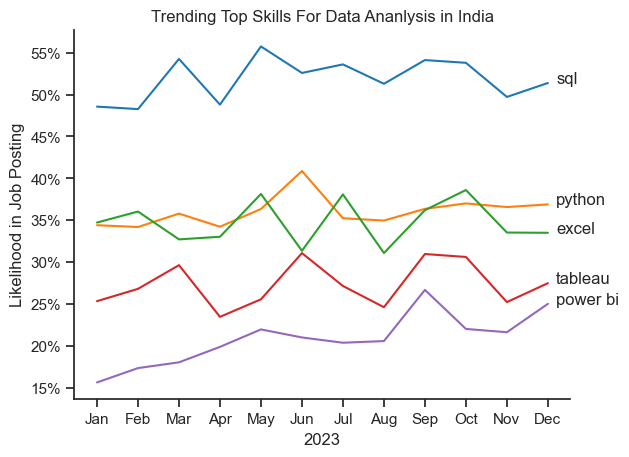

In [28]:
df_plot = df_da_ind_perc.iloc[:, :5]
sns.lineplot(df_plot,dashes=False,palette='tab10')
sns.set_theme(style='ticks')

sns.despine()

plt.title('Trending Top Skills For Data Ananlysis in India')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals = 0))

for i in range(5):
    plt.text(11.2,df_plot.iloc[-1,i], df_plot.columns[i])